# COGS 108 - Final Project 

# Overview

The goal of this project is to understand if there is a relationship between the number of yelp reviews and the number of criminal incidents on its associated neighborhood block, and/or if there is a relationship between the overall yelp rating of a public park and the number of criminal incidents on its block. Specifically, I will be examining public parks in the city of San Diego that have had at least one criminal incident in the year 2019. Ultimately, the analysis suggests that a higher yelp rating for a given park slightly positively correlates to a higher number of criminal incidents on its block. Also, the analysis suggests that a higher number of yelp reviews positively correlates to a higher number of criminal incidents on its block.

# Name & GitHub ID

- Name: Edgar Flores
- GitHub Username: efloresCS

# Research Question

What is the relationship between the properties of a yelp rating of a park and the number of criminal incidents on its neighborhood block?

## Background and Prior Work

To begin, the first thing to understand is the goals of the Parks and Recreation department in San Diego. The San Diego Parks and Recreation Master Plan states that it is their goal to commit to upgrading security and increasing visitor satisfaction to the parks in San Diego. [1] Recently, crime concerns and incidents in the San Diego area have pushed the Parks and Recreation department of San Diego to implement Park curfews [2]. This brings the question of how a visitor's perceived danger of the parks and its surrounding area impacts their satisfaction towards these parks.

Looking into yelp reviews of the local parks in San Diego, one can see evidence of user dissatisfaction in the form of low yelp ratings because they feel that some parks and their areas are dangerous or they feel that their well being is not secured. An example of yelp reviews being used to predict a state of a location is in an analysis where yelp review helped predict unhygienic establishments in Seattle [3] This project relates to my study as my goal is to see if there is a correlation between yelp ratings and the state of crime in a local park. 

Some relevant prior work that underwent a similar project analysis was from a student in COGS 108 who tried to identify the relationship between health inspection scores and yelp ratings. [4] This was a sample project given to us by the instructor. This analysis relates to my project as I will also be trying to find a relationship between a measurable factor of a certain location (the number of criminal incidents) and properties of its yelp reviews such as their frequency and the overall rating of a park. We will be utilizing similar techniques from this sample project in this analysis.

References (include links):
- 1) https://www.sandiego.gov/complete-communities/parks-master-plan#:~:text=The%20Parks%20Master%20Plan%20aligns,equity%2C%20livability%2C%20and%20connectivity.
- 2) https://www.sandiegouniontribune.com/communities/san-diego/story/2020-02-16/park-curfews-on-the-rise-in-san-diego-in-response-to-crime-concerns
- 3) https://dho.stanford.edu/wp-content/uploads/WWW_Final.pdf
- 4) https://github.com/COGS108/IndividProjects-Sp20/blob/main/FinalProject_michelemurakami.ipynb


# Hypothesis


I hypothesize that parks with higher crime rates will have lower yelp ratings. This is because more visitors might feel unsafe in the area, and so will report lower levels of satisfaction with the park. 
I also hypothesize that parks with a higher number of reviews will have a higher number of crime rates. This is because more reviews mean more traffic/people in the area, which might mean more criminal incidents are bound to occur.

# Dataset(s)

The ideal dataset for yelp information would include variables that store the park names in San Diego, its block address, the number of reviews, and the rating of the park itself. The ideal dataset for crime rates would include variables that store a block's address and the number of criminal incidents that have taken place during that year. We could extract information such as the rating for a park, or the number of criminal incidents by using data science programming concepts that we have learned in class.

The observations for the yelp information would be the yelp information of a given park. The observation used for the crime rates would be the number of criminal incidents on the block of a park in San Diego.

The two following datasets were given by the instructor.

- Dataset Name: Yelp_SD_Parks
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_parks.csv
- Number of observations: 833

This dataset includes the name of parks in San Diego, the number of reviews for the park, their exact address, and their associated yelp rating. Though, this dataset also has information on many non-parks such as restaurants or apartments.

- Dataset Name: pd_calls_for_service_2019
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/pd_calls_for_service_2019_datasd.csv
- Number of observations: 590,967

This dataset includes police calls for service in San Diego in 2019 and the block addresses where the incident took place (which is broken down into many columns). 

These are not exactly our ideal datasets. Yelp_SD_Parks has the exact address of the park, and also includes many non-park locations the ideal data set would have had the block address and only park locations. pf_calls_for_service_2019 does not contain park information exclusively either, and the block address is split amongst many columns. Thus, we will have to utilize our data science programming concepts to extract the necessary information from them.

First I plan to drop any columns from these data sets that contain data that I do not have a use for. Then I will clean up both of the datasets by getting the block address of each observation. I will then merge these two datasets by their block address and remove any locations from the data set that are not parks. Then I will analyze this merged dataset to understand if there is a relationship between a park's yelp information and its criminal incidents. 

# Setup

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)
import seaborn as sns
sns.set(style="white", font_scale=2)
import patsy
import statsmodels.api as sm
import scipy.stats as stats

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# for debug
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Data Cleaning

In this section, our goal is to clean up and merge our datasets for easy access and analysis. 

## Loading Data

We will being by loading the datasets that will be used in our analysis.

In [2]:
yelp_df = pd.read_csv(r"C:\Users\E_flo\Downloads\yelp_SD_parks.csv")
crime_df = pd.read_csv(r"C:\Users\E_flo\Downloads\pd_calls_for_service_2019_datasd.csv", dtype = {'address_number_primary': str,
                                                                                               'address_dir_primary':str, 'address_road_primary' :str,
                                                                                                 'address_sfx_primary':str})

## Checking Our Data

In [3]:
yelp_df.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [4]:
crime_df.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E19010000001,2019-01-01 00:00:01,1,3800,NaN,NATIONAL,AVE,NaN,NaN,NaN,AU1,DUP,441,1
1,E19010000002,2019-01-01 00:00:04,1,6500,NaN,REFLECTION,DR,NaN,NaN,NaN,415,K,321,2
2,E19010000003,2019-01-01 00:00:09,1,0,NaN,06TH,AVE,NaN,ISLAND,NaN,FD,K,523,2
3,E19010000004,2019-01-01 00:00:19,1,0,NaN,VESTA,ST,NaN,MAIN,NaN,AU1,W,511,1
4,E19010000005,2019-01-01 00:00:31,1,0,NaN,04TH,AVE,NaN,ISLAND,NaN,586,CAN,523,4


## Dropping Columns

In this section, we will be dropping columns that hold data that we will not be using in our analysis. 

We dropped the following columns from the yelp dataset because

- phone, id, url, longitude, latitude
    - Since we have the address of the park, this extra identifying information is unnecessary. 
- is_closed
    - Whether the park is currently closed is not relevant information as we want to analyze the incidents that occurred in 2019.

We dropped the following columns from the crime dataset because

- incident_num, date_time, day_of_week, priority
    - The exact incident number, priority, day_of_week, or time of day is not important to us, we only care which block the incident took place.
- address_dir_intersecting. address_road_intersecting, address_sfx_intersecting
    - We cannot be sure if the incident took place on a park's block if we only know a cross street.
    - This means we will also have to drop observations that only have cross street information (see the section on cleaning up the crime data).
- beat
    - We are already given the block of the incident so the general territory that the police patrolled is redundant.


In [5]:
yelp_df = yelp_df.drop(["phone", "id", "url", "longitude", "latitude", "is_closed"], axis=1)
crime_df = crime_df.drop(["incident_num", "date_time", "day_of_week", "address_dir_intersecting",
                          "address_road_intersecting", "address_sfx_intersecting", "beat", "priority"], axis=1)


## Cleaning the Crime Data

We will drop any observations that have an address number set as 0 as we can not be sure if these incidents took place on a specific block.

In [6]:
crime_df = crime_df[crime_df.address_number_primary != "0"]

We will also drop any observation that have missing values on the call type or disposition as they will not give us substantial information in clearly knowing if these incidents were verified to be criminal or were cancelled calls.

In [7]:
crime_df = crime_df.dropna(subset=['call_type'], axis = 0)
crime_df = crime_df.dropna(subset=['disposition'], axis = 0)


Next, our goal is to merge the four address columns to make a complete address.

In [8]:
crime_df = crime_df.fillna("")
crime_df = crime_df.assign(block_address = crime_df['address_number_primary'])

crime_df['block_address'] = crime_df['address_number_primary'] + " " + crime_df['address_dir_primary'] + " " + crime_df['address_road_primary'] + " " + crime_df['address_sfx_primary']
crime_df['block_address'] = crime_df['block_address'].str.replace('  ', ' ')
        
#Re-order the columns for clarity
crime_df = crime_df[['block_address', 'call_type', 'disposition', 'address_number_primary', 'address_dir_primary', 'address_road_primary', 'address_sfx_primary']]

Next, using the disposition information, we will remove any calls for service that are not verified criminal incidents such as those that were canceled or those that were unfounded.

In [9]:
#Remove calls that were cancelled
crime_df = crime_df[crime_df.disposition != "CAN"]
crime_df = crime_df[crime_df.disposition != "X"]
crime_df = crime_df[crime_df.disposition != "W"]

#Remove unfounded service calls
crime_df = crime_df[crime_df.disposition != "U"]

In order to merge with our park data, we want to focus on the number of incidents that took place a particular block, so we will make a new data frame object 
that holds the addresses of the blocks and the number of criminal incidents that took place on those blocks in the year 2019.

In [10]:
crime_df['criminal_incidents'] = crime_df.groupby('block_address')['block_address'].transform('count')
crime_rate_df = pd.concat([crime_df['block_address'], crime_df['criminal_incidents']], axis=1, keys=['block_address', 'criminal_incidents'])

#delete any duplicate observations
crime_rate_df = crime_rate_df.drop_duplicates(subset=['block_address'])

## Clean Yelp Data

The goal of this section is to obtain the block address of each park. We will obtain this by removing the last three elements of the yelp address (city, state, zip code), and round the address number down.

In [11]:
#Remove zip, city and state info
yelp_df["clean_address"] = yelp_df["address"].apply(lambda x: " ".join(x.split()[: -2]))

cities = ['San Diego,','Coronado,','La Jolla,', 'Chula Vista,', 'Oceanside,', 'Carlsbad,', 'El Cajon,', 'Encinitas,',
                'Poway,', 'La Mesa,', 'Del Mar,', 'San Marcos,', 'National City,', 'Vista,', 'Santee,', 'Julian,', 'Imperial Beach,', 
                'Spring Valley,', 'Alpine,', 'Rancho San Diego,', 'Fallbrook,', 'Lemon Grove,', 'Bonita,', 'Solana Beach,',
                'Rancho Santa Fe,', 'Lakeside,', 'Ramona,', 'Camp Pendleton North,', 'Jamul,', 'Valley Center,', 'Borrego Springs,', 
                 'Jacumba Hot Springs,', 'Tecate,', 'Bonsall,', 'Potrero,', 'Mount Laguna,', 'Descanso,', 'Campo,', 'Pine Valley,',
                 'Lake San Marcos,', 'Fairbanks Ranch,', 'Harbison Canyon,', 'Camp Pendeleton South,', 'Boulevard,', 'Crest,',
                 'Granite Hills,', 'Bostonia,', 'Rainbow,', 'Winter Gardens,', 'Hidden Meadows,']

#go through each observation, if cities match remove it
for ind in yelp_df.index:
    for curr_word in cities:
        word_list = curr_word.split()
        size = len(word_list)
        if(len(yelp_df['clean_address'][ind].split()) >= size):
            if (word_list == yelp_df['clean_address'][ind].split()[-size:]):
                yelp_df['clean_address'][ind] = ' '.join(yelp_df['clean_address'][ind].split()[:-size])
                break
                
#round down address numbers
yelp_df["clean_address2"] = yelp_df["address"].apply(lambda x: " ".join(x.split()[: 1]))
yelp_df["clean_address"] = yelp_df["clean_address"].apply(lambda x: " ".join(x.split()[1:]))
yelp_df["clean_address2"] = yelp_df["clean_address2"].astype(str)

# # go thorugh and round down numbers
for ind in yelp_df.index:
    if (yelp_df['clean_address2'][ind].isdigit()):
        yelp_df['clean_address2'][ind] = str(int((int(yelp_df['clean_address2'][ind])/ 100))*100)
        

# #Concatenate back together
yelp_df['block_address'] = yelp_df['clean_address2'] + " " + yelp_df['clean_address']

# Now that we have the block_address, we can drop our clean_address and clean_address2 columns
yelp_df = yelp_df.drop(["clean_address", "clean_address2"], axis=1)
yelp_df['block_address'] = yelp_df['block_address'].str.upper() 
yelp_df['name'] = yelp_df['name'].str.upper() 

Finally we will merge the yelp rating information with the crime rate information by their block address

In [12]:
df = pd.merge(yelp_df, crime_rate_df, on='block_address')


We previously noticed that some of the observations from the yelp_SD_parks data are not actually parks, it is impotant that we remove these because, for example, a restaurant with a high rating in an area with a high crime rate can corrupt our analysis.

In [13]:
#Keep all strings that have park in the name
df = df[df.name.str.contains("PARK")]

not_park = ['PARKING', 'PARK-IT-ON-MARKET', 'INN AT THE PARK', 'TOWN PARK BILLAS', 'ENCONTRO NORTH PARK', 'NORTH PARK BEER COMPANY', '619 SPIRITS NORTH PARK',
           'NORTH PARK OPTOMETRY', 'URBN - NORTH PARK', 'NORTH PARK NURSERY', 'PARKSIDE TERRACE', 'UNION COWORK NORTH PARK',
           'COLINA PARK GOLF COURSE']

#Remove all entries with names that are not parks
for curr_word in not_park:
    df = df[~df.name.str.contains(curr_word)]

#reset the index
df.reset_index(drop=True, inplace=True)

# Data Analysis & Results

We weill start by obtaining a general understanding of our data using the describe functionality.

In [14]:
df.describe()

,rating,review_count,criminal_incidents
count,88.000000,88.000000,88.000000
mean,3.909091,40.568182,43.443182
std,0.697061,79.686858,56.615025
min,1.500000,1.000000,1.000000
25%,3.500000,5.000000,10.750000
50%,4.000000,10.500000,24.000000
75%,4.500000,42.500000,55.250000
max,5.000000,542.000000,317.000000


We see that we will be analyzing 89 parks in the San Diego area and these parks have an average yelp_rating of 3.91 and their respective blocks had an average crime rate of about 43 criminal incidents in the year 2019. (note, we are not analyzing all of the parks in San Diego, and this limitation will be discussed in the conclusion)

Let's do some exploratory data visualization to further improve our understanding of the data

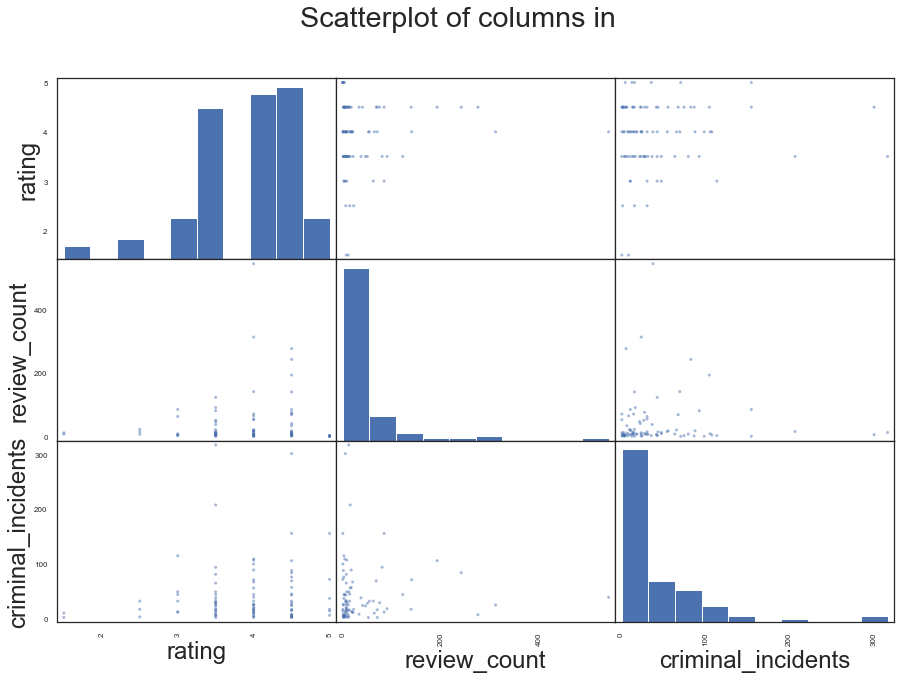

In [15]:
fig = pd.plotting.scatter_matrix(df, figsize=(15,10))
plt.suptitle("Scatterplot of columns in ")
plt.show()

We notice that there some outliers in the columns. Let's take a look to see if the data is alright to work with.

In [16]:
#check max value in review count
print(df.loc[df['rating'].idxmax()])
#check max value in crime counts
print(df.loc[df['criminal_incidents'].idxmax()])
#check max value in ewview counts
print(df.loc[df['review_count'].idxmax()])
#check min value in review count
print(df.loc[df['review_count'].idxmin()])
#check min value in review count
print(df.loc[df['rating'].idxmin()])

name                                      WHITE DEER PARK
address               2811 Jackson St San Diego, CA 92110
rating                                                  5
review_count                                            1
block_address                             2800 JACKSON ST
criminal_incidents                                    155
Name: 2, dtype: object
name                     COLINA DEL SOL PARK & REC CENTER
address               5319 Orange Ave San Diego, CA 92115
rating                                                3.5
review_count                                           13
block_address                             5300 ORANGE AVE
criminal_incidents                                    317
Name: 38, dtype: object
name                  OLD TOWN SAN DIEGO STATE HISTORIC PARK
address                  4002 Wallace St San Diego, CA 92110
rating                                                     4
review_count                                             542
block_address

These are all valid parks, so this data seems fine to work with. We will continue our analysis.

Next, we will plot the distributions of our data, we will also clean up the names for better viewing.

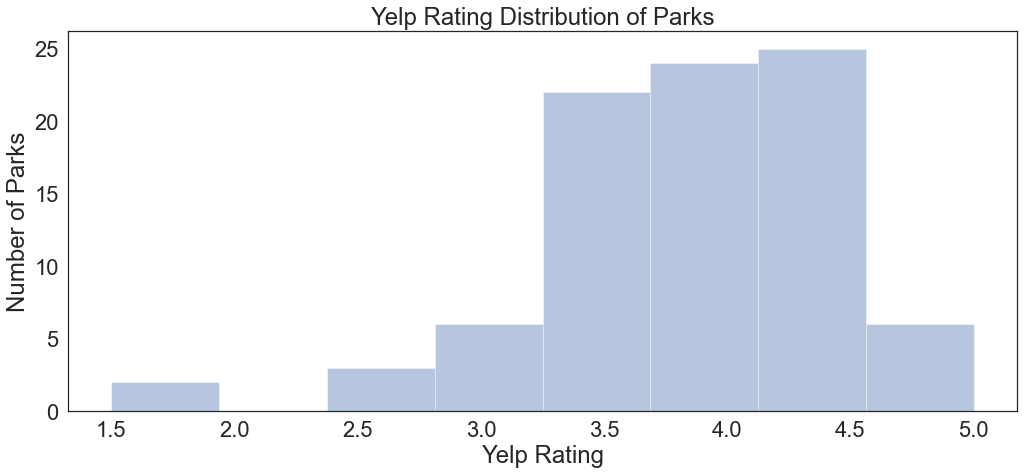

In [17]:
f2 = sns.distplot(df['rating'], kde=False)
f2.set_title('Yelp Rating Distribution of Parks')
f2.set_ylabel('Number of Parks')
f2.set_xlabel('Yelp Rating')
f2 = plt.gcf()

For our Rating Distribution, we see that the scores can acheive a max rating of 5.0 and we see that most of the parks hold a rating of 3.5-4.5.

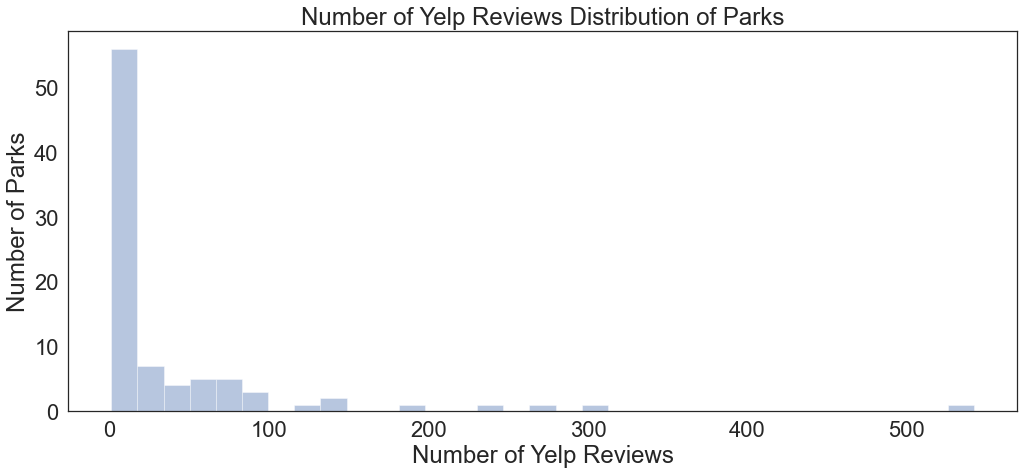

In [18]:
f4 = sns.distplot(df['review_count'], kde=False)
f4.set_title('Number of Yelp Reviews Distribution of Parks')
f4.set_ylabel('Number of Parks')
f4.set_xlabel('Number of Yelp Reviews')
f4 = plt.gcf()

For our number of Yelp Reviews Distribution, we see that most parks had less than 100 review

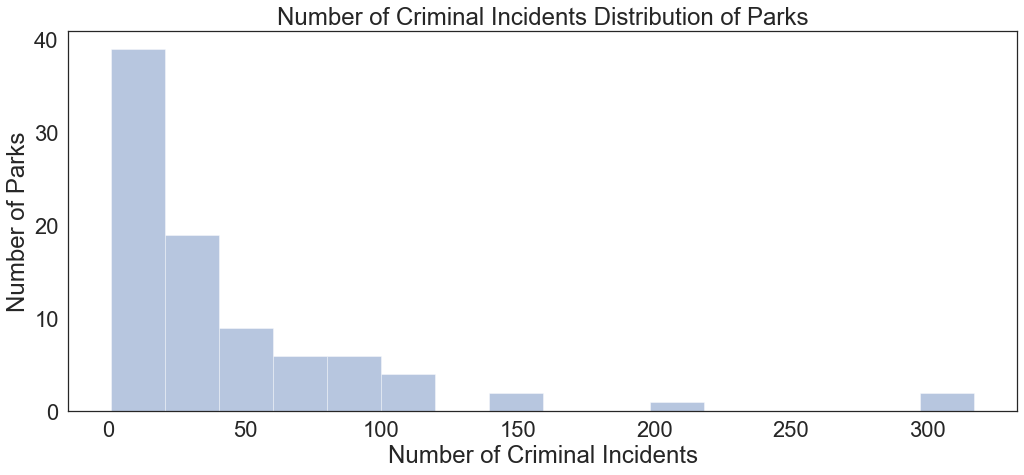

In [19]:
f3 = sns.distplot(df['criminal_incidents'], kde=False)
f3.set_title('Number of Criminal Incidents Distribution of Parks')
f3.set_ylabel('Number of Parks')
f3.set_xlabel('Number of Criminal Incidents')
f3 = plt.gcf()

For our Number of Criminal Incidents Distribution, we see that most parks in San Diego had approximately less than 50 criminal incidents in 2019.

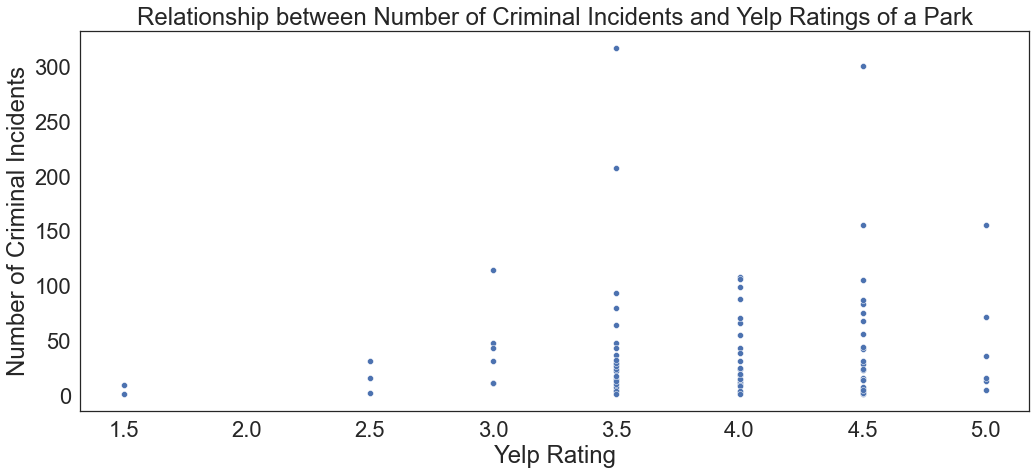

In [20]:
f4 = sns.scatterplot(x='rating', y='criminal_incidents', data=df)
f4.set_title('Relationship between Number of Criminal Incidents and Yelp Ratings of a Park')
f4.set_xlabel('Yelp Rating')
f4.set_ylabel('Number of Criminal Incidents')
f4 = plt.gcf()

The relationship between the number of criminal incidents on a park's block and yelp rating of a park is unclear, we will utilize the technique of linear regression to better analyze our data

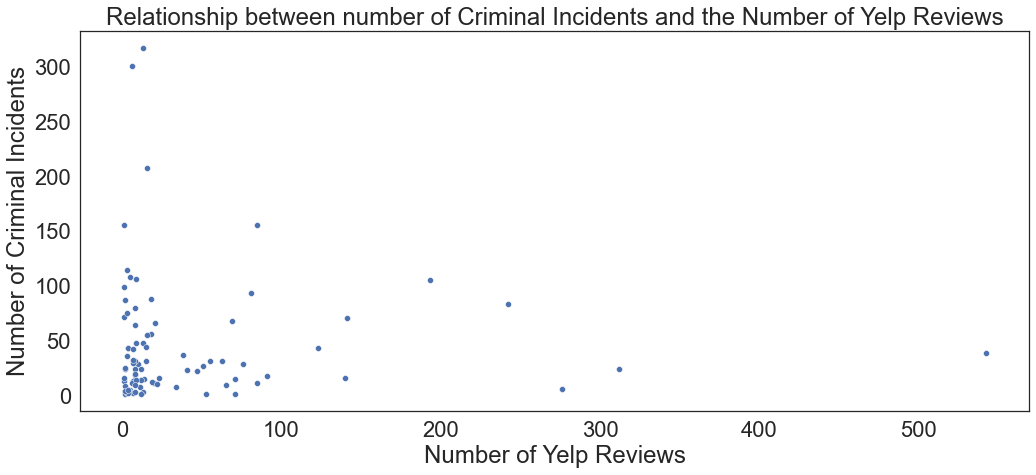

In [21]:
f4 = sns.scatterplot(x='review_count', y='criminal_incidents', data=df)
f4.set_title('Relationship between number of Criminal Incidents and the Number of Yelp Reviews')
f4.set_xlabel('Number of Yelp Reviews')
f4.set_ylabel('Number of Criminal Incidents')
f4 = plt.gcf()

The relationship betwee the number of criminal incidents on a park's block and number of yelp ratings of a park is unclear, we will utilize the technique of linear regression to better analyze this data as well.

## Analysis using Linear Regression

In [22]:
#create thje model
outcome, predictors = patsy.dmatrices('criminal_incidents ~ rating', df)
mod = sm.OLS(outcome, predictors)

## fit the model
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     criminal_incidents   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7681
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.383
Time:                        08:45:16   Log-Likelihood:                -479.16
No. Observations:                  88   AIC:                             962.3
Df Residuals:                      86   BIC:                             967.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.5702     34.616      0.392      0.6

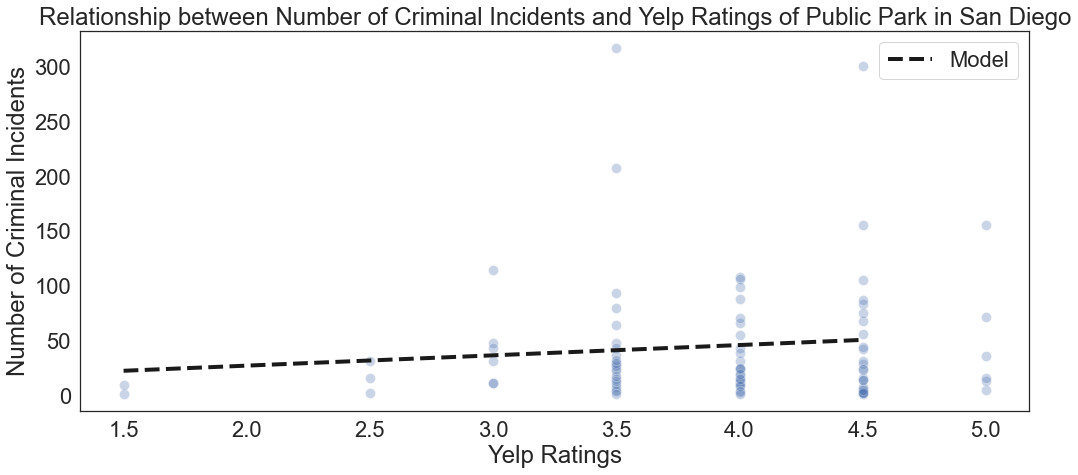

In [23]:
# Plot the orginal data (as before)
sns.scatterplot(x='rating', y='criminal_incidents', alpha=0.3, data=df, s=100)

# Generate and plot the model fit line
xs = np.arange(df['rating'].min(), df['rating'].max())
ys = 9.4110 * xs + 8.0928
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Yelp Ratings')
plt.ylabel('Number of Criminal Incidents')
plt.title('Relationship between Number of Criminal Incidents and Yelp Ratings of Public Park in San Diego')
plt.legend();

The model suggests that there may be a small correlation between the number of criminal incidents on a park's block and the yelp rating of that park. The higher the Yelp rating, the higher the criminal incidents.

In [24]:
#create thje model
outcome, predictors = patsy.dmatrices('criminal_incidents ~ review_count', df)
mod = sm.OLS(outcome, predictors)

## fit the model
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     criminal_incidents   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                  0.003176
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.955
Time:                        08:45:16   Log-Likelihood:                -479.55
No. Observations:                  88   AIC:                             963.1
Df Residuals:                      86   BIC:                             968.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       43.6183      6.819      6.396   

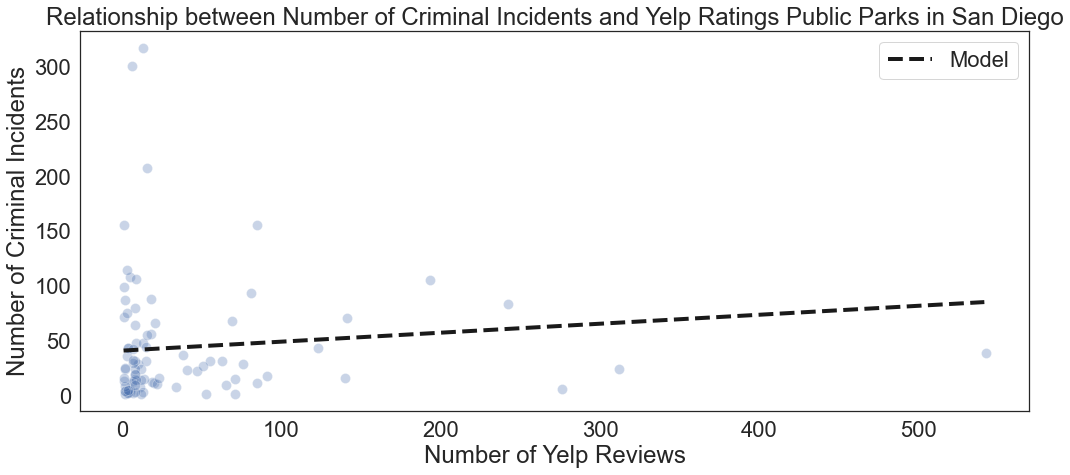

In [25]:
# Plot the orginal data (as before)
sns.scatterplot(x='review_count', y='criminal_incidents', alpha=0.3, data=df, s=100)

# Generate and plot the model fit line
xs = np.arange(df['review_count'].min(), df['review_count'].max())
ys = 0.0820 * xs + 40.6137
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Number of Yelp Reviews')
plt.ylabel('Number of Criminal Incidents')
plt.title('Relationship between Number of Criminal Incidents and Yelp Ratings Public Parks in San Diego')
plt.legend();

The model suggests that there may be a larger positive correlation between the number of Yelp reviews and the number of criminal incidents on a park's block. The higher the number of Yelp reviews, the higher the criminal incidents.

# Ethics & Privacy

There is a concern for bias in the yelp user reviews. Since a factor of this project depends on the opinions of users, these user's might have a bias on the parks based on such factors as the neighborhood it is in or even the social status or race of people who have been seen at the parks, and though unsafe conditions have not been observed by the user, they might deem it as dangerous based on their prejudice/human bias. It is impossible to know/account for the bias of each user, but it is important to note this is in our analysis. This is also a limitation of this analysis.

A concern is that there is an issue in how the crime rates are collected. Since it will depend on reported criminal incidents, and since many criminal incidents go unreported, this is not a completely accurate method of accessing the complete amount of criminal incidents that occur at any given park. It is impossible to know if the criminal incidents reported are all of the incidents that occurred,, but it is important to note this in our analysis.

Also, there is a concern for bias in canceled or unfounded police calls. There is a chance that an actual criminal incident took place, it might have just not been communicated well or police service was incorrectly deemed to be unnecessary by an official. This is an issue of human error, and though this is unavoidable, it should be noted. 

The datasets used were provided for me and no user information was used for this analysis. Though someone could easily google the yelp reviews on a park that was explicitly shown on this analysis and find out who were the users who left it, this shouldn't be an issue as yelp information is already public.

# Conclusion & Discussion

The purpose of this analysis was to understand if there is a relationship between the yelp rating of a park and the number of criminal incidents in its area (by block), as well as the number of yelp reviews and the criminal incidents. We did not exactly start with an ideal dataset so a substantial amount of data wrangling was applied to get the data into a manageable state. Next, we merged the information on the yelp information of the parks and the criminal incidents on its block. After, we described and explored our data on yelp ratings, the number of yelp reviews, and the number of criminal incidents. Finally, we used linear regression to explore and visualize their relationship with each other. Based on these results we found that there is a slight positive correlation between Yelp ratings and the number of criminal incidents. Meaning, that the higher the yelp rating, the higher number of criminal incidents. This analysis goes against my original hypothesis stating that the lower the yelp rating, the higher number of criminal incidents. We also found that there is a slight positive correlation between the number of yelp reviews and the number of criminal incidents, which follows my original hypothesis. 

There were some limitations to this analysis. One is that we did not analyze all of the parks in the San Diego Area. The San Diego Parks and Recreation website states that there are around 340 parks in San Diego and we only analyzed 89 of them. One reason for this was that this analysis focused on parks with at least one criminal incident in the year 2019. Aside from this, some parks might have been overlooked because my method of extracting park information from the yelp dataset was flawed, or because some parks were not listed on yelp. Since we made our data frame object by combing observations from yelp_parks and pd_calls_for_2019 by the block address column, if there were no calls to a specific park block, it would not be in our dataset. A follow-up analysis would consist of including all ~340 parks, including ones that did not have criminal incidents. Another limitation was in understanding the data from the pd_service_calls_2019 dataset. As I am not well versed in police jargon, nor do I have any prior experience with disposition codes or call types, I might have excluded some criminal incidents or included some non-criminal incidents because of my lack of specialization in this field. Also, I chose to analyze the year 2019 instead of 2020 because 2020 has been an unprecedented year due to the COVID-19 pandemic. If I would have analyzed 2020 there might have been some deviation from these results because of certain crime rate increases that have been reported during this year.

Understanding if there are a relationship between public (yelp) reviews and crime rate can have an important impact on society. From the results of this project, this might be able to change the common perspective that a badly reviewed park that is not held in good public opinion is not necessarily a dangerous one, and the more popular park near your city might be.